In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../data/isoclassify/isoclassify_outputs_DR14.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,id_starname,teff,teff_err,logg,logg_err,feh,feh_err,lum,lum_err,gmag,...,dir_teff_err2,dir_mabs,dir_mabs_err1,dir_mabs_err2,dir_mass,dir_mass_err1,dir_mass_err2,dir_rho,dir_rho_err1,dir_rho_err2
0,KIC5822889,5184.0103,94.43386,3.401706,0.012167,-0.026246,0.039186,-99,0,-99,...,-94.43386,0.192337,0.057803,-0.058261,0.0,0.0,-0.0,0.0,0.0,-0.0
1,KIC7799349,4976.7870,82.60566,3.670984,0.007718,0.284619,0.029484,-99,0,-99,...,-82.60566,1.213493,0.033218,-0.033533,0.0,0.0,-0.0,0.0,0.0,-0.0
2,KIC12069569,6062.4185,168.10576,3.825712,0.060999,-0.084244,0.066659,-99,0,-99,...,-168.10576,1.316289,0.043069,-0.043379,0.0,0.0,-0.0,0.0,0.0,-0.0
3,KIC5950854,5914.0347,134.60000,4.237158,0.009836,-0.173085,0.073964,-99,0,-99,...,-134.60000,2.726344,0.036510,-0.036819,0.0,0.0,-0.0,0.0,0.0,-0.0
4,KIC6947945,5334.4380,103.46670,3.794063,0.011004,-0.041512,0.043107,-99,0,-99,...,-103.46670,1.598508,0.042779,-0.043015,0.0,0.0,-0.0,0.0,0.0,-0.0


In [4]:
df['dir_lum_err'] = (df['dir_lum_err1'] - df['dir_lum_err2']) / 2
df['dir_lum_rel_err'] = df['dir_lum_err'] / df['dir_lum']

In [5]:
df.loc[df['dir_lum_err'].idxmax(), 'id_starname']

'KIC10454113'

In [6]:
df = df.loc[~(df['dir_lum_rel_err']>1.)]

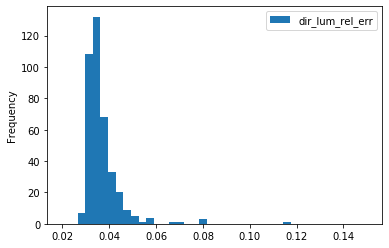

In [7]:
df.plot(kind='hist', y='dir_lum_rel_err', range=(0.02, 0.15), bins=40)

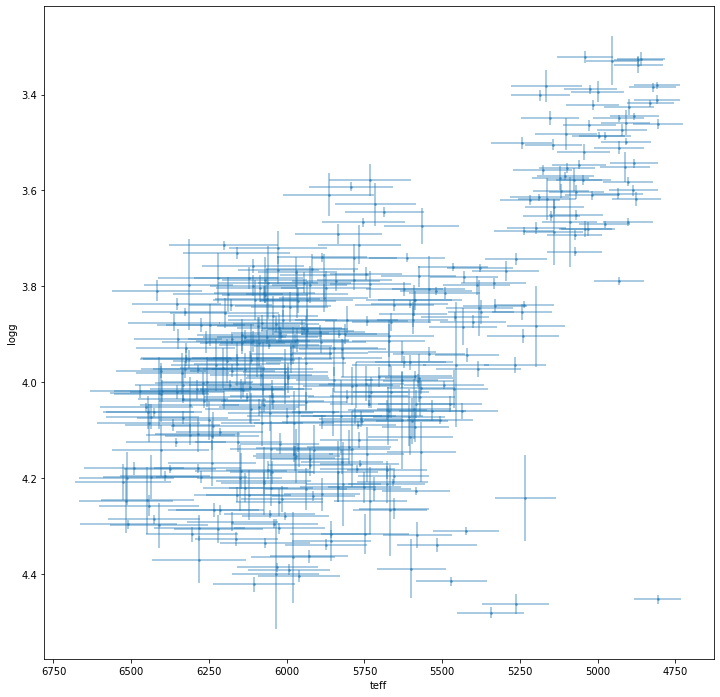

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))

df.plot(ax=ax, kind='scatter', x='teff', xerr='teff_err', y='logg', yerr='logg_err',
             s=3, alpha=0.5)

ax.invert_xaxis()
ax.invert_yaxis()

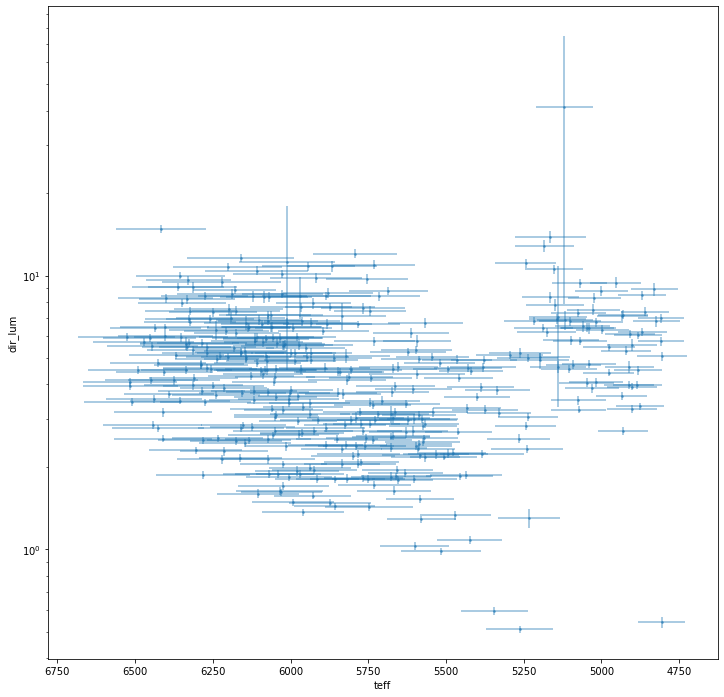

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))

df.plot(ax=ax, kind='scatter', x='teff', xerr='teff_err', y='dir_lum', yerr='dir_lum_err',
             s=3, alpha=0.5)

ax.set_yscale('log')
ax.invert_xaxis()

In [10]:
# df['rel_eDnu'] = df['eDnu'] / df['Dnu']
# df.plot(kind='hist', y='rel_eDnu', bins=40)

In [11]:
# df.plot(kind='hist', y='[M/H]_SDSS')

In [12]:
# df.plot(kind='hist', y='Mass_SDSS')

In [17]:
df_old = pd.read_csv('../data/archive/s17-b18-gaia-2mass_lum.csv')
df_old.head()

,KIC,numax,enumax,Dnu,eDnu,Length,HBR,Teff_SDSS,eTeff_SDSS,[M/H]_SDSS,...,eAV,bc_K_SDSS,bc_K_err_SDSS,bc_G_SDSS,bc_G_err_SDSS,e_D,AK,eAK,luminosity_K_SDSS,luminosity_err_K_SDSS
0,1435467,1382.311,19.038,70.558,0.087,938.1,1.662,6433.0,86.0,-0.028,...,0.04,1.103013,0.042746,0.054203,0.027562,0.5585,0.003703,0.00644,4.369024,0.190293
1,2010607,674.919,146.523,42.479,2.185,28.9,1.547,6361.0,71.0,-0.070,...,0.04,1.112154,0.036232,-0.120773,0.036044,10.1290,0.038640,0.00644,9.828233,0.492869
2,2309595,643.208,11.226,39.029,0.721,28.9,1.767,5238.0,65.0,-0.095,...,0.04,1.731236,0.038113,-0.086824,0.035706,4.1630,0.020930,0.00644,3.887663,0.173967
3,2450729,1053.105,114.904,61.910,2.539,28.9,1.470,6029.0,59.0,-0.212,...,0.04,1.287448,0.031693,-0.068466,0.036927,2.1610,0.026243,0.00644,3.548918,0.133401
4,2837475,1629.761,18.396,75.720,0.129,1029.4,1.767,6688.0,57.0,-0.015,...,0.04,0.978417,0.027737,0.041740,0.030834,0.4190,0.006762,0.00644,4.852174,0.178559


In [26]:
df['KIC'] = df['id_starname'].str[3:].astype(int)

In [28]:
df_all = df.merge(df_old, on='KIC')

In [29]:
df_all['L'] = df_all['R']**2 * (df_all['Teff']/5777.)**4

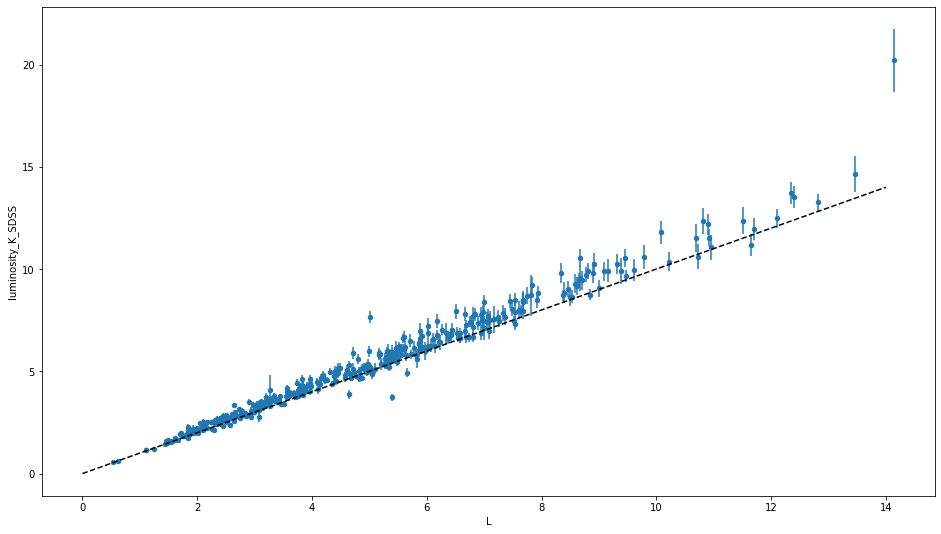

In [33]:
fig, ax = plt.subplots(figsize=(16, 9))

df_all.plot(ax=ax, kind='scatter', x='L', y='luminosity_K_SDSS', 
       yerr='luminosity_err_K_SDSS')
ax.plot(np.arange(15), 'k--')

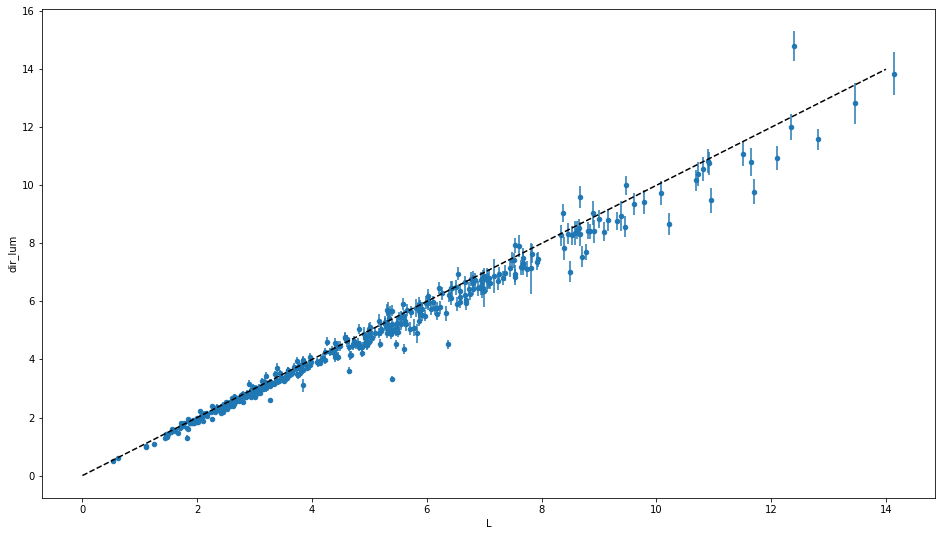

In [34]:
fig, ax = plt.subplots(figsize=(16, 9))

df_all.plot(ax=ax, kind='scatter', x='L', y='dir_lum', 
        yerr='dir_lum_err1')
ax.plot(np.arange(15), 'k--')

This shows that my luminosity calculated with the SDSS griz photmetric temperature scale is over, and the luminosity calculated with the APOGEE DR14 (ASPCAP) spectroscopic temperature scale is under that of Berger 2018. Some investigation found the dominant cause of this to be the differing temperature scales. High Teff ---> Low BC ---> High L. Spec Teff is typically lower than photometric Teff. The Berger Teff scale lies somewhere in the middle.